# Artificial Neural Net Classification - TensorFlow Keras

### The Data

The data is taken from the LendingCLub dataset found on Kaggle. LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California. It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform. The dataset includes histrocial data on loans given out with information on the borrowers accounts and details of the loans themselves.

### Task

In this project exploratory data analysis will be conducted on the dataset and will be preprocessed so that an artificial neural net can be built to classifiy whether loan borrowers defaulted on their loans or not. The ANN will be constructed using TensforFlow Keras library in Python. The model will then be evaluated in terms of its accuracy

### Workflow

- Loading and importing datasets
- Exploratory data analysis using seaborn visualisation library
- Preprocessing the data, addressing missing data and categorical variables
- Scaling the data and conducting a train test split
- Building the artificial neural net model
- Evaluate model performance

### Import neccessary libraries

In [76]:
# import neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pickle
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix
import random

## Section 1: Loading and Importing Datasets

- Import separate dataset that consist of descriptions of the features in the main dataset
- Make a function that returns the description of an input feature
- Import the lendingclub dataset
- Inspect the lendingclub dataset

In [77]:
# import the feature information dataframe
feat_df = pd.read_csv('lending_club_info.csv')

In [78]:
# inspect the feature dataframe
print(feat_df['LoanStatNew'].unique())
feat_df.head()

['loan_amnt' 'term' 'int_rate' 'installment' 'grade' 'sub_grade'
 'emp_title' 'emp_length' 'home_ownership' 'annual_inc'
 'verification_status' 'issue_d' 'loan_status' 'purpose' 'title'
 'zip_code' 'addr_state' 'dti' 'earliest_cr_line' 'open_acc' 'pub_rec'
 'revol_bal' 'revol_util' 'total_acc' 'initial_list_status'
 'application_type' 'mort_acc' 'pub_rec_bankruptcies']


,LoanStatNew,Description
0,loan_amnt,The listed amount of the loan applied for by t...
1,term,The number of payments on the loan. Values are...
2,int_rate,Interest Rate on the loan
3,installment,The monthly payment owed by the borrower if th...
4,grade,LC assigned loan grade


In [79]:
# make a function we can call the will return the description of the input feature
def feat_info(feature):
    return feat_df.loc[feat_df.index[feat_df['LoanStatNew']==feature].to_list()[0]]['Description']

In [80]:
# test the function
feat_info('revol_bal')

'Total credit revolving balance'

In [81]:
# import the lendind club dataset
df = pd.read_csv('lending_club_loan.csv')

In [82]:
# look at the head of the dataframe
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [83]:
# look at the info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [84]:
# look at the statistical metrics of the numerical columns of df
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


## Section 2: Exploratory Data Analysis & Using Seaborn Visualisation Library

- Understand which variables are important
- View summary statistics
- Visualise the data with seaborn library

<AxesSubplot:xlabel='loan_status', ylabel='count'>

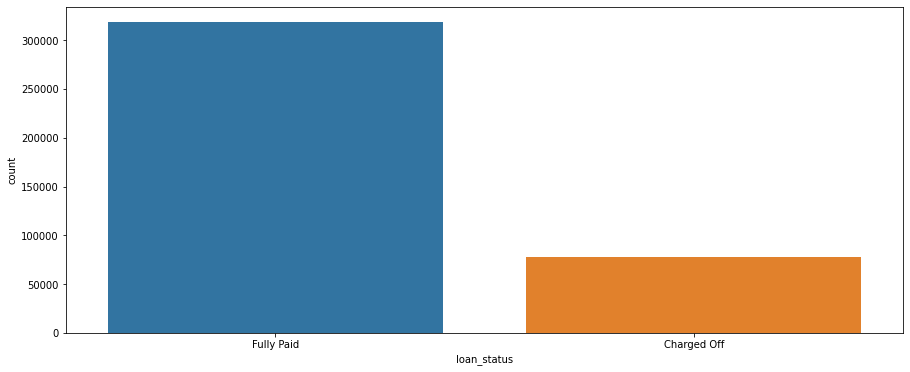

In [85]:
# create a countplot of the target variable which is 'loan status'
plt.figure(figsize=[15,6])
sns.countplot(data=df, x='loan_status')

There are a lot more instances of fully paid loans compared to charged off. When evaluating our model vw can expect to do well with accuracy metrics, however precision and recall will suffer due to the imbalance; hence, precision and recall will be the true metrics that we are going to evaluate our model on.

<AxesSubplot:xlabel='loan_amnt', ylabel='Count'>

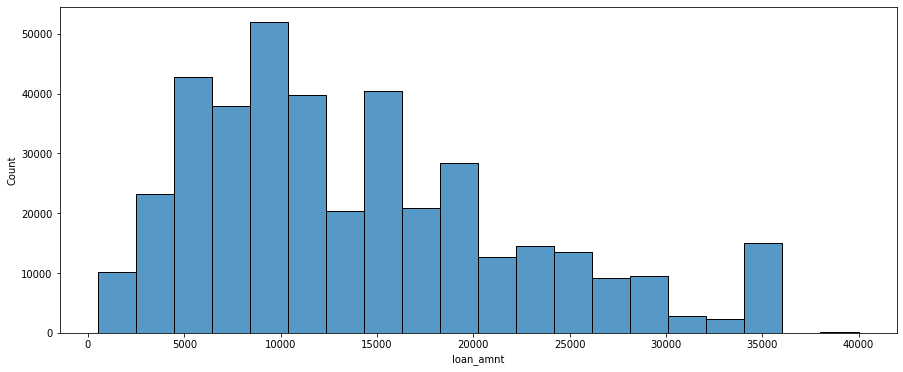

In [86]:
# creating a histogram of the 'loan_amnt' column
plt.figure(figsize=[15,6])
sns.histplot(data=df, x='loan_amnt', bins=20)

<AxesSubplot:>

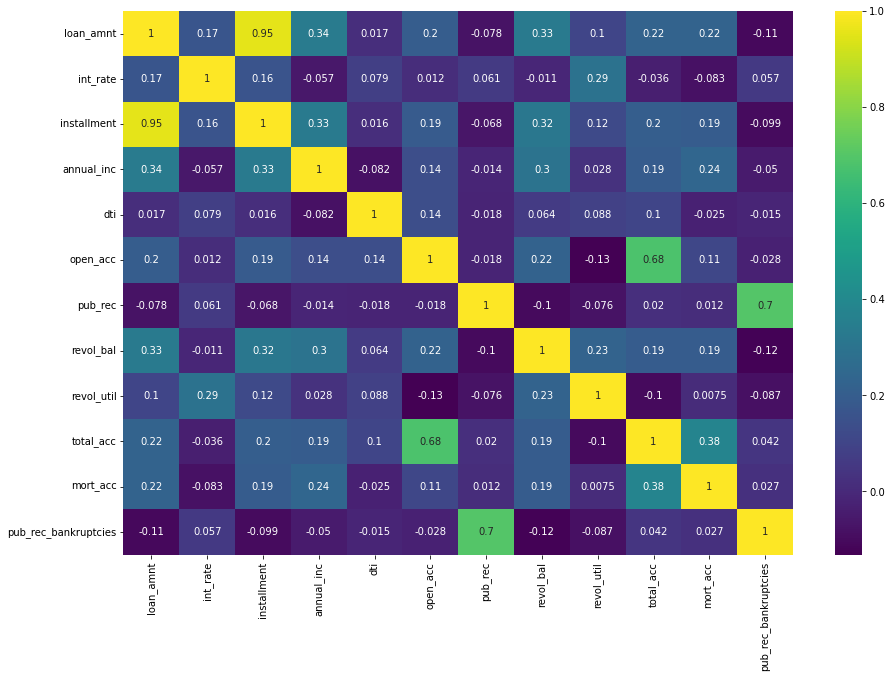

In [87]:
# explore the correlation between the continuous variables of df
# visualise with a heatmap
plt.figure(figsize=[15,10])
sns.heatmap(df.corr(), annot=True, cmap='viridis')

Note there is an almost perfect correlation between 'loan_amnt' and 'installment', this requires further inspection. 

We Must make sure there is not a single feature that predicts the label perfectly, this would be classed as data leaking and would indicate that it is not a feature and that it is duplicate information that is very similar to the label.

In [88]:
# look at the descriptions of 'installment' & 'loan_amnt'
print('Installment: {}'.format(feat_info('installment')))
print('\n')
print('Loan_Amnt: {}'.format(feat_info('loan_amnt')))

Installment: The monthly payment owed by the borrower if the loan originates.


Loan_Amnt: The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


After looking at the descriptions this explains why these two features are strongly correlated. The company most likely utilises the same function to generate installment amounts no matter what the loan amount is.

<AxesSubplot:xlabel='installment', ylabel='loan_amnt'>

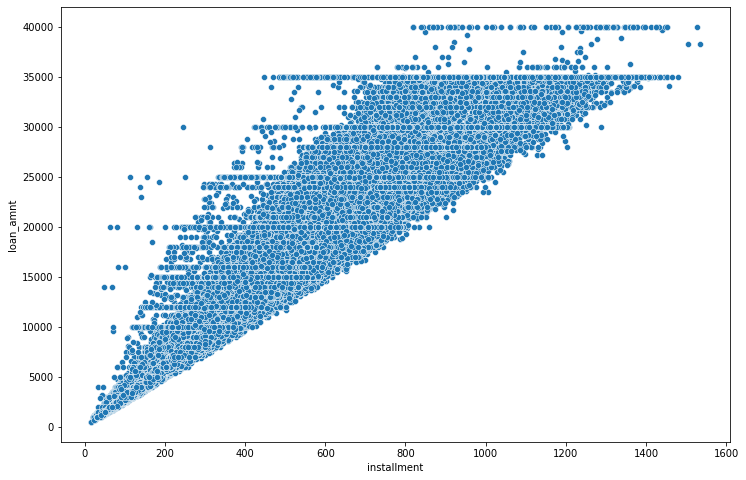

In [89]:
# create a scatterplot between 'loan_amnt' & 'installment'
plt.figure(figsize=[12,8])
sns.scatterplot(data=df, x='installment', y='loan_amnt')

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

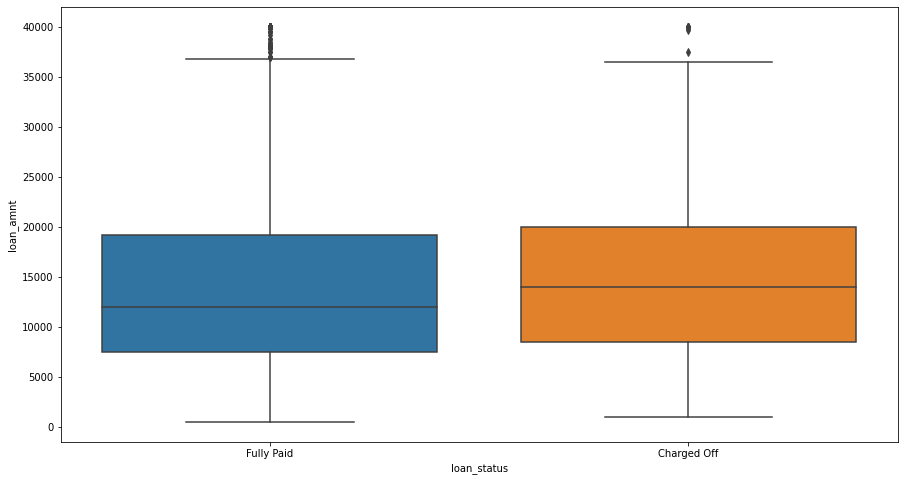

In [90]:
# create a boxplot showing relationship between 'loan_status' and 'loan_amnt'
plt.figure(figsize=[15,8])
sns.boxplot(data=df, x='loan_status', y='loan_amnt')

There is very little difference between these boxplots. In these scenarios it is good practice to look at the actual figures.

In [91]:
# looking at the summary statistics of the above boxplot
df.groupby('loan_status').describe()['loan_amnt']

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [92]:
# explore the 'Grade' and 'SubGrade' columns that LendingClub categorise loans by
# look at the unique grades LendingClub offer
print("Grades: {}".format(sorted(list(df['grade'].unique()))))
print("Sub Grades: {}".format(sorted(list(df['sub_grade'].unique()))))

Grades: ['A', 'B', 'C', 'D', 'E', 'F', 'G']
Sub Grades: ['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5']


<AxesSubplot:xlabel='grade', ylabel='count'>

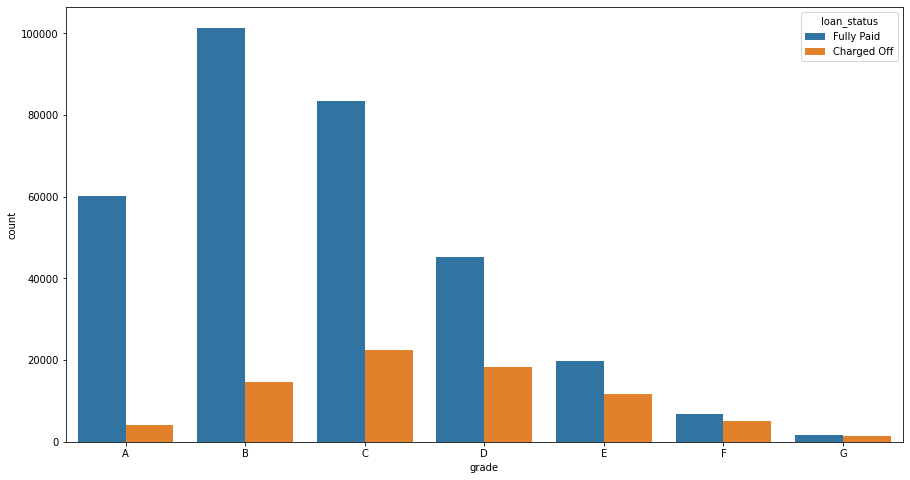

In [93]:
# create a countplot for each grade separated by 'loan_status'
plt.figure(figsize=[15,8])
sns.countplot(data=df, x='grade', hue='loan_status', order=sorted(list(df['grade'].unique())))

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

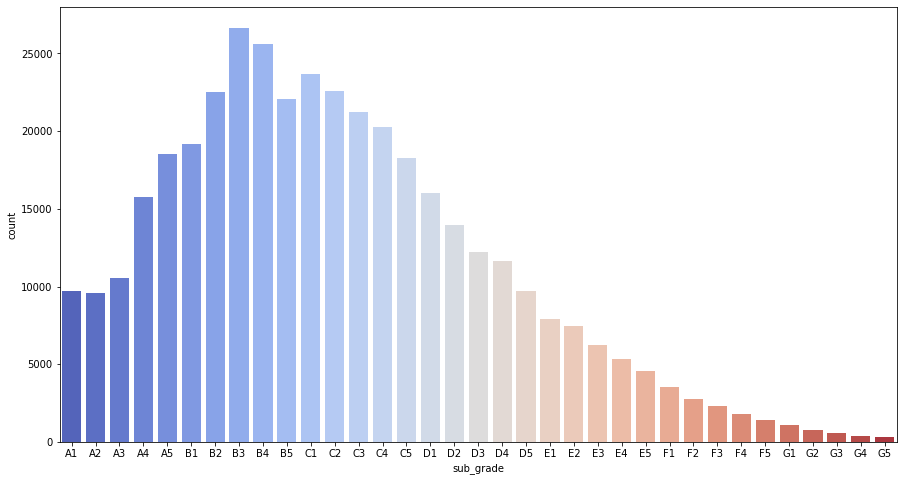

In [94]:
# create a countplot per subgrade
plt.figure(figsize=[15,8])
sns.countplot(data=df, x='sub_grade', order=sorted(list(df['sub_grade'].unique())), palette='coolwarm')

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

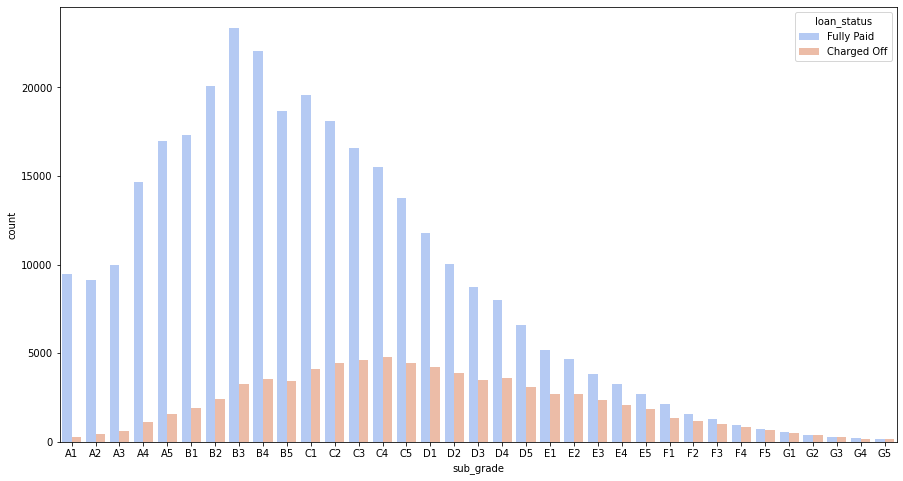

In [95]:
# create the same countplot however break each 'sub_grade' down by 'loan_status'
plt.figure(figsize=[15,8])
sns.countplot(data=df, x='sub_grade', hue='loan_status', order=sorted(list(df['sub_grade'].unique())), palette='coolwarm')

The two countplots show that subgrades F & G rarely get paid back. Lets isolate these subgrades and inspect.

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

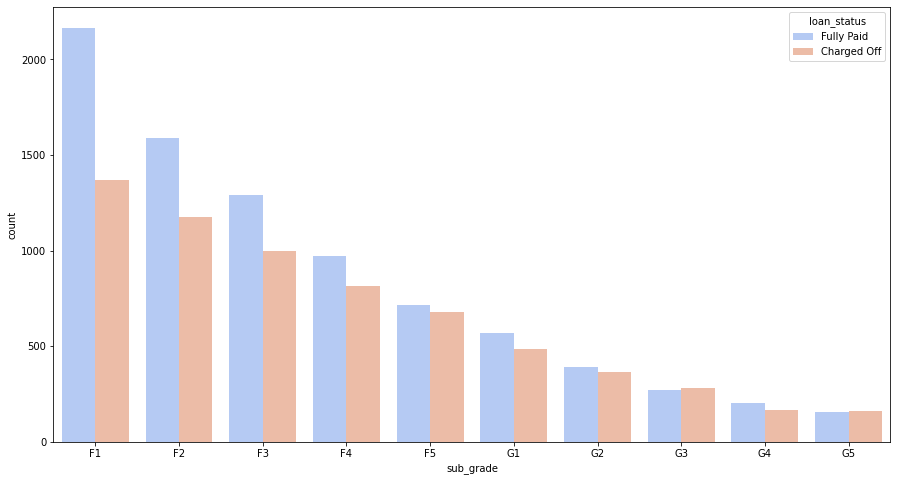

In [96]:
# create countplot for subgrade f and g with breakdown by 'loan_status'
df_grades = df[(df['grade']=='F') | (df['grade']=='G')]
plt.figure(figsize=[15,8])
sns.countplot(data=df_grades, x='sub_grade', hue='loan_status', order=sorted(list(df_grades['sub_grade'].unique())), palette='coolwarm')

The current target label 'loan_status' is a string, in order to look at how the other features are correlated with the target label we must convert it to a numeric. We can do this by changing the two categories of 'Fully Paid' & 'Charged Off' to 1's & 0's. Pandas built in function *get_dummies()* will be used before then visualising the correlation of features with the new target varaible column 'loan_repaid' in a countplot.

In [97]:
# create a new column called 'loan_repaid' which will be the dummy variables for 'loan_status'
# use pd.get_dummies() & remember to set drop_first=True so that you prevent data leaking
# you you had many categories you would need to get rid of the first one
# because if all other categories have a zero then it will obviously be the last category
df['loan_repaid'] = pd.get_dummies(df['loan_status'], drop_first=True)
df[['loan_status', 'loan_repaid']]

,loan_status,loan_repaid
0,Fully Paid,1
1,Fully Paid,1
2,Fully Paid,1
3,Fully Paid,1
4,Charged Off,0
...,...,...
396025,Fully Paid,1
396026,Fully Paid,1
396027,Fully Paid,1
396028,Fully Paid,1


In [98]:
df.corr()['loan_repaid'][:-1].sort_values()

int_rate               -0.247758
revol_util             -0.082373
dti                    -0.062413
loan_amnt              -0.059836
installment            -0.041082
open_acc               -0.028012
pub_rec                -0.019933
pub_rec_bankruptcies   -0.009383
revol_bal               0.010892
total_acc               0.017893
annual_inc              0.053432
mort_acc                0.073111
Name: loan_repaid, dtype: float64

<AxesSubplot:>

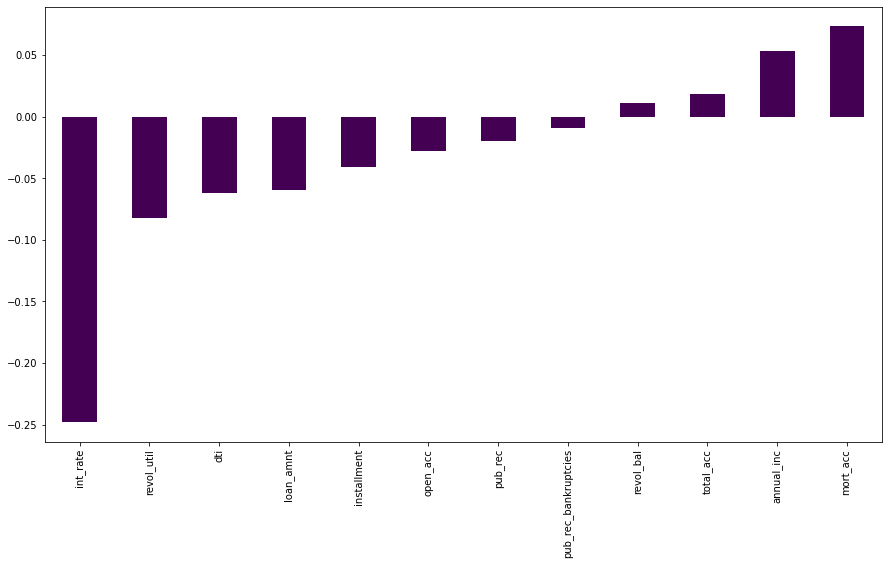

In [99]:
# now visualise the correlation with seaborn's countplot
plt.figure(figsize=[15,8])
df.corr()['loan_repaid'][:-1].sort_values().plot(kind='bar', cmap='viridis')

## Section 3: Preprocessing the Data, Addressing Missing Data and Categorical Variables

- Address missing data by either eliminating or filling in the data
- Remove uneccessary or repetitive features
- Convert categorical string features to dummy variables

### Missing Data

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64


<AxesSubplot:>

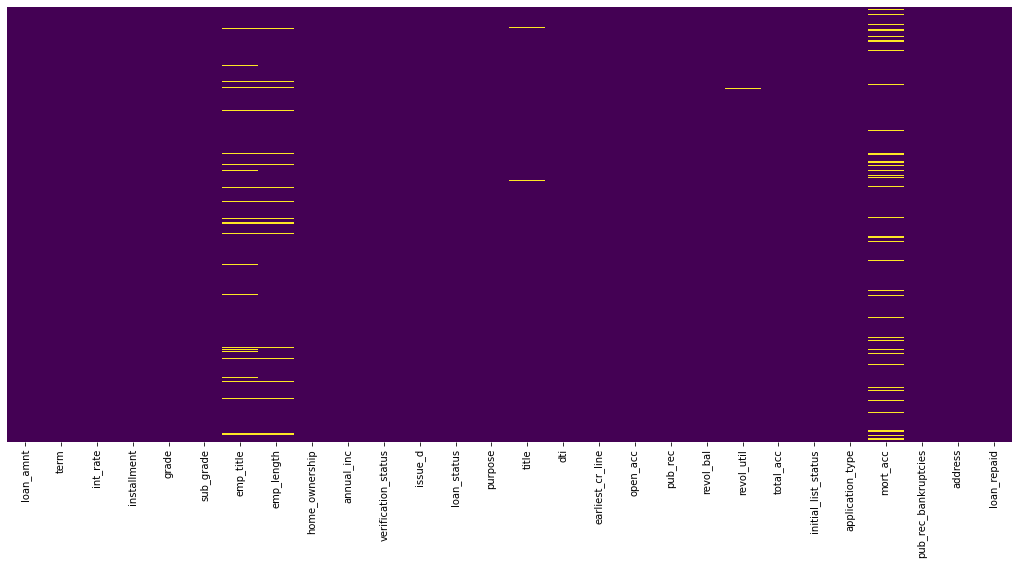

In [100]:
# first identify where there is missing data
# look at both the numerical figures and also visualise with a heatmap
print(df.isnull().sum())
plt.figure(figsize=[18,8])
sns.heatmap(data=df.isnull(), cbar=False, yticklabels=False, cmap='viridis')

In [101]:
# look at the number of erros as a percentage of the total number of rows in the dataframe
df.isnull().sum() / df.shape[0] * 100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

This list will be worked through one by one until the data is clean. This process will start with looking at 'emp_title' and 'emp_length' and whether it is ok to drop them.

In [102]:
# look at the descriptions for 'emp_length' & 'emp_title'
print("emp_title: {}".format(feat_info('emp_title')))
print('\n')
print("emp_length: {}".format(feat_info('emp_length')))

emp_title: The job title supplied by the Borrower when applying for the loan.*


emp_length: Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


In [103]:
# how many unique employment job titles are there?
print(df['emp_title'].nunique ())
df['emp_title'].value_counts()

173105


Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: emp_title, Length: 173105, dtype: int64

There are too many unique jobs titles to convert this to a dummy variable feature, hence *emp_title* will be dropped.

In [104]:
# drop emp_title column
df.drop('emp_title', axis=1, inplace=True)

['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years']


<AxesSubplot:xlabel='emp_length', ylabel='count'>

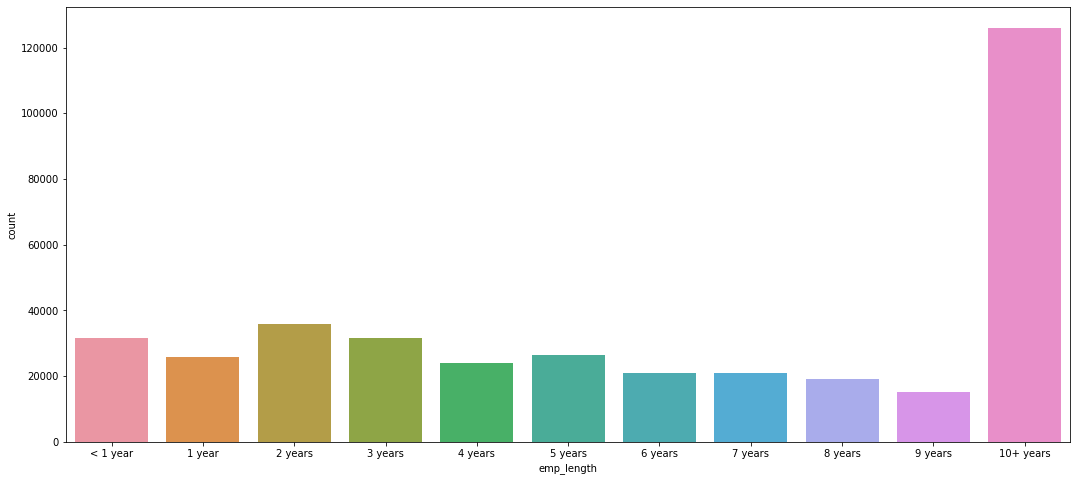

In [105]:
# now inspect 'emp_length' and visualise
# create the correct order of 'emp_length' unique values
order = sorted(list(df['emp_length'].unique().astype('str')))[:-1]
order.insert(0,order[-1])
order.insert(-1,order[2])
order.pop(-1)
order.pop(2)
print(order)

plt.figure(figsize=[18,8])
sns.countplot(x='emp_length', data=df, order=order)

<AxesSubplot:xlabel='emp_length', ylabel='count'>

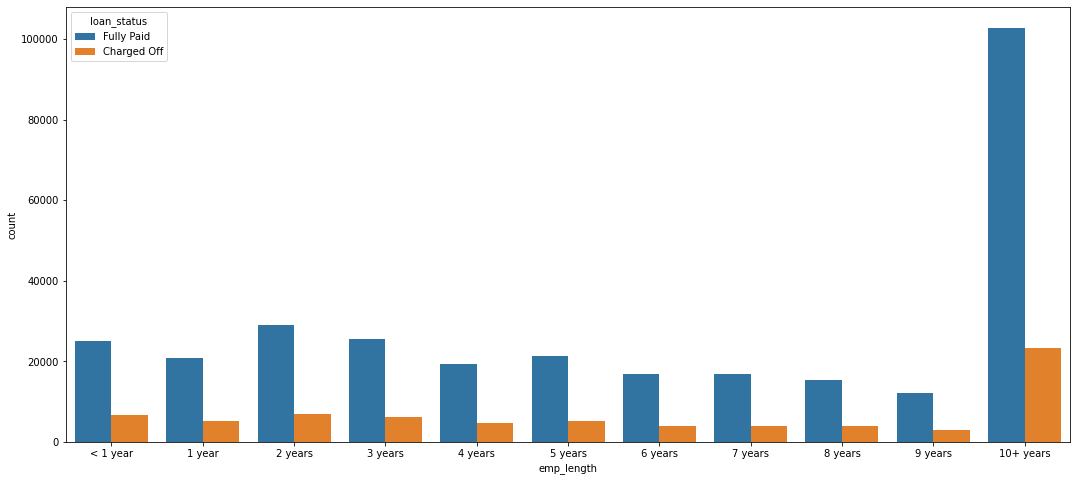

In [106]:
# create the same plot but provide a breakdown by 'loan_status'
plt.figure(figsize=[18,8])
sns.countplot(x='emp_length', data=df, order=order, hue='loan_status')

This still does not inform whether there is a strong relationship between employment length and loan status. What would be good to look at is the percentage of charged off loans per employee length.

            % Charged Off
emp_length               
1 year           0.199135
10+ years        0.184186
2 years          0.193262
3 years          0.195231
4 years          0.192385
5 years          0.192187
6 years          0.189194
7 years          0.194774
8 years          0.199760
9 years          0.200470
< 1 year         0.206872


<AxesSubplot:xlabel='emp_length', ylabel='% Charged Off'>

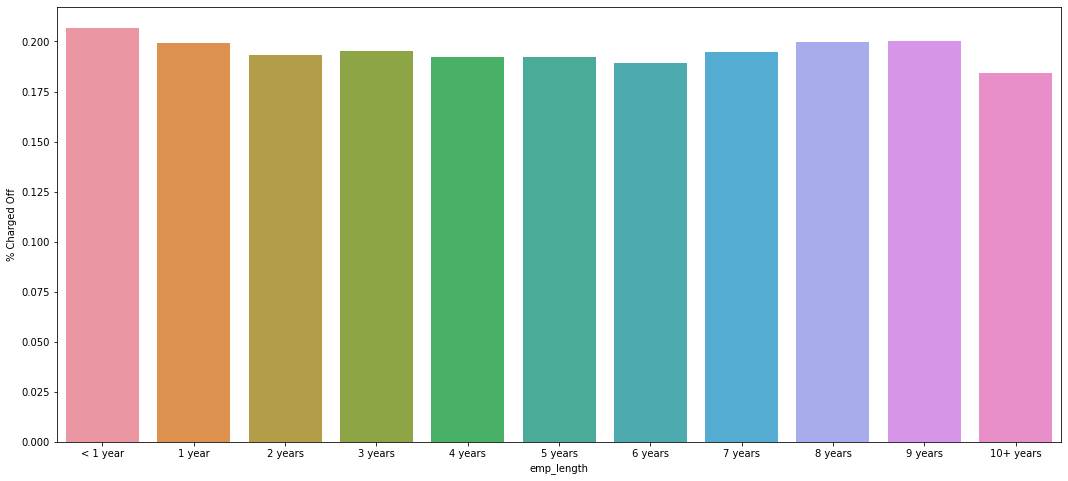

In [107]:
# create a dataframe showing the percent of loans 'charged off'
# do this for each 'emp_length' category
df_pc = (df[df['loan_status']=='Charged Off'].groupby('emp_length').count()['loan_amnt'] / df.groupby('emp_length').count()['loan_amnt']).to_frame().rename(columns={'loan_amnt':'% Charged Off'})
print(df_pc)

# visualise with a barplot with seaborn
plt.figure(figsize=[18,8])
sns.barplot(data=df_pc, x=df_pc.index, y='% Charged Off', order=order)

There is a not a siginifcant correlation between employment lengths and loan status, so this feature will be removed.

In [108]:
# remove emp_length
df.drop('emp_length', axis=1, inplace=True)

Continue to work through the missing values in df. Next up is looking at the title column.

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64


<AxesSubplot:>

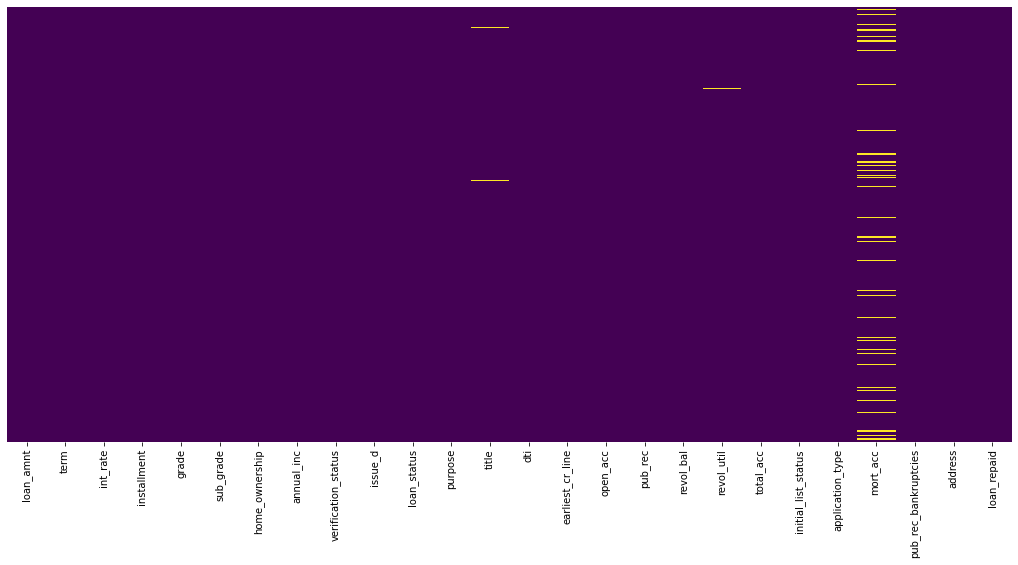

In [109]:
# relook at the errors in the dataframe
print(df.isnull().sum())
plt.figure(figsize=[18,8])
sns.heatmap(data=df.isnull(), cbar=False, yticklabels=False, cmap='viridis')

In [110]:
# comparing the 'title' and 'purpose' columns
df[['title', 'purpose']].value_counts()

title                                  purpose           
Debt consolidation                     debt_consolidation    152106
Credit card refinancing                credit_card            51354
Home improvement                       home_improvement       15182
Other                                  other                  12878
Debt Consolidation                     debt_consolidation     10837
                                                              ...  
Going green for good                   major_purchase             1
Going out high interest credit cards.  credit_card                1
Going to Make it                       credit_card                1
Going to be proud owner of home        house                      1
~Summer Fun~                           home_improvement           1
Length: 54958, dtype: int64

It seems that the title column is simply a string subcategory/description of the purpose column; hence, it will be dropped.

In [111]:
# drop the 'title' column
df.drop('title', axis=1, inplace=True)

Next is to look at *mort_acc* column now contains the largest number of errors compared to the other columns in the df. The missing values in this column will be filled in by the mean of *mort_acc* when grouped by the corresponding total_acc value.

Other approaches to fill in the missing data could be:
- creating a simple linear model to predict values for *mort_acc*.
- bin the column into categories and then set NaN as its own category

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64


<AxesSubplot:>

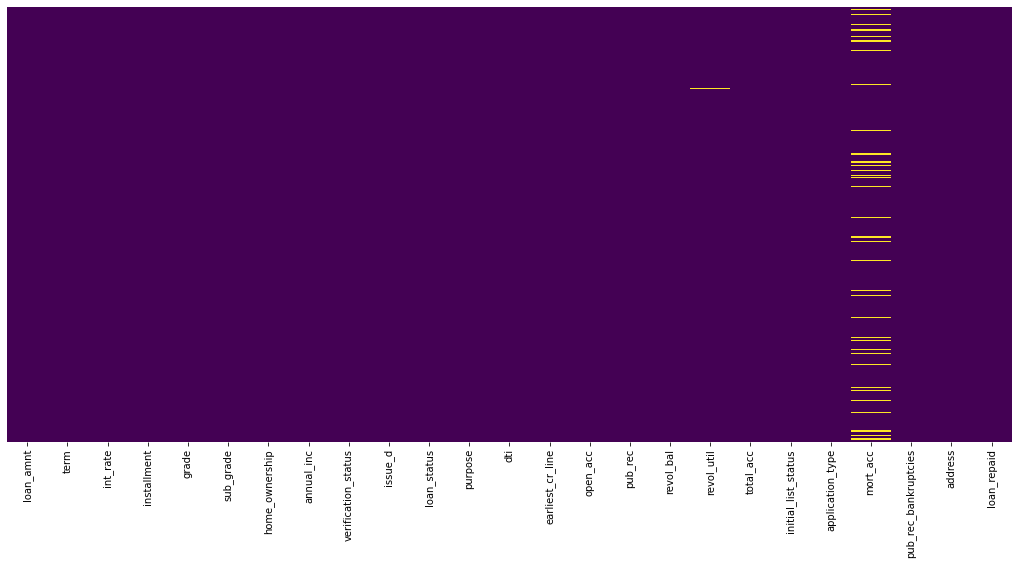

In [112]:
# relook at the errors in the dataframe
print(df.isnull().sum())
plt.figure(figsize=[18,8])
sns.heatmap(data=df.isnull(), cbar=False, yticklabels=False, cmap='viridis')

In [113]:
# seeing which variables correlate the highest with 'mort_acc'
df.corr()['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

Here we can see what is the feature most correlated with *mort_acc* is *total_acc* which makes sense because people with a higher number of total accounts are more likely to have a higher number of mortgage accounts.

In [114]:
# calculating the mean 'mort_acc' when grouped by 'total_acc'
df_mean_by_ta = df.groupby('total_acc').mean()['mort_acc'].to_frame()
df_mean_by_ta

,mort_acc
total_acc,
2.0,0.000000
3.0,0.052023
4.0,0.066743
5.0,0.103289
6.0,0.151293
...,...
124.0,1.000000
129.0,1.000000
135.0,3.000000


In [115]:
# now to fill in missing values of 'mort_acc'
# replacing values with the mean of 'mort_acc' when grouped by corresponding 'total_acc' value
# need to create a function to do this
# then use .apply() with a lambda function

def error_iron(total_acc_value, mort_acc_value):
    
    if np.isnan(mort_acc_value)==False:
        return mort_acc_value
    
    elif np.isnan(mort_acc_value)==True:
        return df_mean_by_ta.loc[total_acc_value][0]
    
# now call the function
df['mort_acc'] = df[['total_acc','mort_acc']].apply(lambda x: error_iron(x[0], x[1]), axis=1)

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64


<AxesSubplot:>

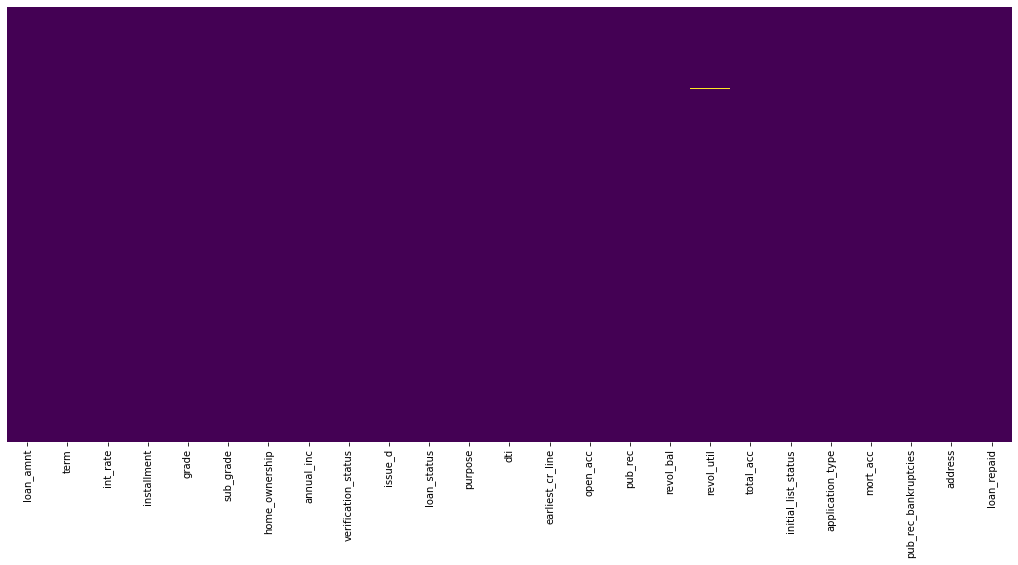

In [116]:
# relooking at the errors in df
# relook at the errors in the dataframe
print(df.isnull().sum())
plt.figure(figsize=[18,8])
sns.heatmap(data=df.isnull(), cbar=False, yticklabels=False, cmap='viridis')

There are now no more errors in the *mort_acc* column. The last two columns left account for less than %0.5 of the total data so the rows containing the errors will simply be removed.

In [117]:
# remove rows with errors in both 'revol_util' & 'pub_rec_bankruptcies' columns
df.dropna(subset=['revol_util', 'pub_rec_bankruptcies'], inplace=True)

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64


<AxesSubplot:>

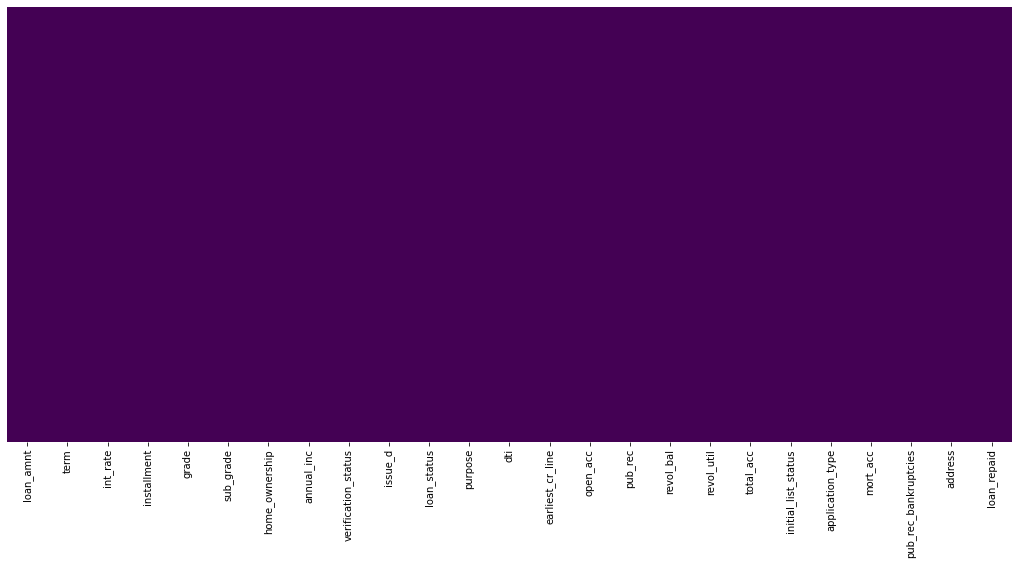

In [118]:
# relooking at the errros in df
# relooking at the errors in df
# relook at the errors in the dataframe
print(df.isnull().sum())
plt.figure(figsize=[18,8])
sns.heatmap(data=df.isnull(), cbar=False, yticklabels=False, cmap='viridis')

There are no more errors so the next task is to move onto the categorical string features and changing them to dummy variable features.

### Categorical Variables and Dummy Variables

Now time to explore the categorical string variables and see if they can be converted into dummy variable features. We will begin by looking at all the non-numeric columns in the dataframe; furthermore, each feature will be reviewed one by one.

In [119]:
# seeing what columns are non-numeric in df
df.select_dtypes(include='object').columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

#### *term*

In [120]:
# see the value counts of the 'term' column
df['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [121]:
# convert the two unique strings to numbers respectively
df['term'] = np.where(df['term'].str.contains('36 months'), 36, 60)

In [122]:
# recheck the value counts and check the datatype
print(df['term'].dtype)
df['term'].value_counts()

int32


36    301247
60     93972
Name: term, dtype: int64

#### *grade*

In [123]:
# already know that grade is part of subgrade so we can drop this column
df.drop('grade', axis=1, inplace=True)

#### *sub_grade*

In [124]:
# convert the subgrade column to dummy variables and concatenate to df, also drop the origional sub grade column after concat
df = pd.concat([df,pd.get_dummies(df['sub_grade'], drop_first=True)], axis=1)
df.drop('sub_grade', axis=1, inplace=True)
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

#### *verification_status, application_type, initial_list_status, purpose*

In [125]:
df['verification_status'].value_counts()

Verified           139451
Source Verified    131301
Not Verified       124467
Name: verification_status, dtype: int64

In [126]:
df['application_type'].value_counts()

INDIVIDUAL    394508
JOINT            425
DIRECT_PAY       286
Name: application_type, dtype: int64

In [127]:
df['initial_list_status'].value_counts()

f    237346
w    157873
Name: initial_list_status, dtype: int64

In [128]:
df['purpose'].value_counts()

debt_consolidation    234169
credit_card            82923
home_improvement       23961
other                  21059
major_purchase          8756
small_business          5656
car                     4670
medical                 4175
moving                  2842
vacation                2442
house                   2197
wedding                 1794
renewable_energy         329
educational              246
Name: purpose, dtype: int64

In [129]:
# convert all these columns to dummy variables and concatenate to df
# drop all origional columns from the dataframe
df = pd.concat([df, pd.get_dummies(df[['verification_status', 'application_type', 'initial_list_status', 'purpose']], drop_first=True)], axis=1)
df.drop(['verification_status', 'application_type', 'initial_list_status', 'purpose'], axis=1, inplace=True)
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'issue_d', 'loan_status', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2',
       'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1',
       'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purp

#### *home_ownership*

In [130]:
# look at value counts of 'home_ownership' column
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [131]:
# convert 'NONE' and 'ANY' to 'OTHER' so that there are only 4 categories
# then convert to dummy variables and concatenate to df
# drop origional 'home_ownership' column
df['home_ownership'].replace(['NONE','ANY'], 'OTHER', inplace=True)
df = pd.concat([df, pd.get_dummies(df['home_ownership'], drop_first=True)], axis=1)
df.drop('home_ownership', axis=1, inplace=True)
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'issue_d',
       'loan_status', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2', 'A3', 'A4',
       'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1',
       'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3',
       'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'OTH

#### *address*

In [132]:
# taking a feature engineering approach with the address column to extract the zip code from each row
# create a new zip code column using lambda expression on address column
df['zip_code'] = df['address'].apply(lambda x: x[-5:])
df['zip_code'].value_counts()

70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: zip_code, dtype: int64

In [133]:
# note theres is only a handful of zip codes so we can convert the new zip code column to dummy variables and concat to df
# then drop both the address and origional zip code column
df = pd.concat([df, pd.get_dummies(df['zip_code'], drop_first=True)], axis=1)
df.drop(['address', 'zip_code'], axis=1, inplace=True)
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'issue_d',
       'loan_status', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1',
       'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3',
       'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5',
       'G1', 'G2', 'G3', 'G4', 'G5', 'verification_status_Source Verified',
       'verification_status_Verified', 'application_type_INDIVIDUAL',
       'application_type_JOINT', 'initial_list_status_w',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'OTHER', 'OWN', 'RENT'

#### *issue_d*

In [134]:
# the issue date column implies that the loan application has been accepted, HOWEVER...
# we would not know before hand whether nor not a loan would be issued when using our model
# hence we must remove this column otherwise it would be data leakage
df.drop('issue_d', axis=1, inplace=True)

#### *earliest_cr_line*

In [135]:
# feature engineer this column to extract the year from the timestamp
# create a new column called 'earliest_cr_year' and drop the origional 'earliest_cr_line' column
df['earliest_cr_year'] = pd.to_datetime(df['earliest_cr_line']).apply(lambda x: x.year)
df.drop('earliest_cr_line', axis=1, inplace=True)

#### *loan_status*

In [136]:
# we have already created a column of 1's and 0's to replace the loan_status column, hence it can be dropped
df.drop('loan_status', axis=1, inplace=True)

In [137]:
# now look to see if there are any remaining non-numeric columns
df.select_dtypes(include='object').columns

Index([], dtype='object')

All the non-numerics columns have now been converted to numerics ones. The next step is the train test split the data and apply a standard scaler before building the artificial neural net.

## Section 4: Scaling the Data and Conducting a Train Test Split

Keep in mind that the artificial neural net will not accept dataframe structures, hence *.values* must be used when specifying inputs for train test split. Furthermore, the scaler used will be *StandardScaler*.

In [138]:
# define the variables to enter into the train test split
# IMPORTANT TO NOTE: neural net only takes in values and will not accept dataframes as inputs so must use .values
X = df.drop('loan_repaid', axis=1).values
y = df['loan_repaid'].values

In [139]:
# now split the data into a training set and a testing set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=107)

In [140]:
# now make an instance of the 'StandardScaler' and train the scaler on x_train
# then transform both x_train and x_test datasets
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [141]:
# save the scaler using pickle
with open('classification_scaler', 'wb') as file:
    pickle.dump(scaler, file)

In [142]:
# this is the code to load the scaler file using pickle
#with open('classification_scaler', 'rb') as scaler_file:
#    scaler = pickle.load(scaler_file)

## Section 5: Building the Artificial Neural Net Model

The neural net will resemble the following construction: *78--> 39--> 19--> 1*.

A rectified linear unit (ReLU) activation function will be used for the input and hidden layers of the net. However, for the output layer the activation function will be Sigmoid because this model is predicting a binary classification so the results must be between 0 and 1.

Seeing as the output is a binary classification, the type of loss function will be *binary_crossentropy* because it is a binary classification prediction.

The optimizer used will be Adam seeing as this is generally the best performing optimizer.

Dropout layers help prevent against overfitting on the training data. This involves a random percentage of nodes being switched off in a given layer each epoch. Dropout layers will be added to the input and the hidden layer but obviously not the output layer.

Lastly, early stopping will be implemented so that the model will stop as soon as the loss function reaches a minimum. This will save time on training the model.

In [143]:
# seeing how many inputs we have in the model
x_train.shape

(316175, 78)

In [144]:
# creating an instance of Sequential
model = Sequential()

# input layer
model.add(Dense(units=78, activation='relu'))
model.add(Dropout(0.2))

# hidden layer 1
model.add(Dense(units=39, activation='relu'))
model.add(Dropout(0.2))

# hidden layer 2
model.add(Dense(units=19, activation='relu'))
model.add(Dropout(0.2))

# output layer
# remember it is a binary classification model so the activation should be a sigmoid function so values are between 0 and 1
model.add(Dense(units=1, activation='sigmoid'))

# now compile the model
# remember it is a binary classification problem so the loss metric should be binary_crossentropy
model.compile(loss='binary_crossentropy', optimizer='adam')

In [145]:
# creating an early_stop variable to add into the model
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=25, verbose=1)

In [146]:
# now time to fit the model to the training data
# due to the size of the data we can alter the batch size to help with reduce the training time
# we can enter an arbitrarily large epoch number seeing as we have applied an early stop callback
# the fit method has an option to pass in validation data so we get an update on the loss during each epoch
model.fit(x_train, y_train, batch_size=256, epochs=500, verbose=1, callbacks=early_stop, validation_data=(x_test, y_test))

Epoch 1/500
1236/1236 [==============================] - 10s 6ms/step - loss: 0.2991 - val_loss: 0.2611
Epoch 2/500
1236/1236 [==============================] - 8s 6ms/step - loss: 0.2648 - val_loss: 0.2575
Epoch 3/500
1236/1236 [==============================] - 8s 6ms/step - loss: 0.2611 - val_loss: 0.2570
Epoch 4/500
1236/1236 [==============================] - 7s 6ms/step - loss: 0.2595 - val_loss: 0.2560
Epoch 5/500
1236/1236 [==============================] - 8s 6ms/step - loss: 0.2587 - val_loss: 0.2556
Epoch 6/500
1236/1236 [==============================] - 8s 6ms/step - loss: 0.2582 - val_loss: 0.2560
Epoch 7/500
1236/1236 [==============================] - 8s 6ms/step - loss: 0.2576 - val_loss: 0.2549
Epoch 8/500
1236/1236 [==============================] - 7s 6ms/step - loss: 0.2571 - val_loss: 0.2553
Epoch 9/500
1236/1236 [==============================] - 8s 6ms/step - loss: 0.2566 - val_loss: 0.2551
Epoch 10/500
1236/1236 [==============================] - 7s 6ms/step - 

In [147]:
# we can save the model by writing the following code as saving as a .h5 filetype
model.save('ANN Binary Classification Model.h5')

In [148]:
# if we want to load the model we can use the following code
#model = load_model('ANN Binary Classification Model.h5')

## Section 6: Evaluate Model Performance

In [149]:
# save both the training loss and the validation loss and put them into a dataframe
df_loss = pd.DataFrame(model.history.history)
df_loss.head()

,loss,val_loss
0,0.299082,0.261143
1,0.264816,0.257496
2,0.261133,0.257020
3,0.259536,0.255983
4,0.258746,0.255631


<AxesSubplot:>

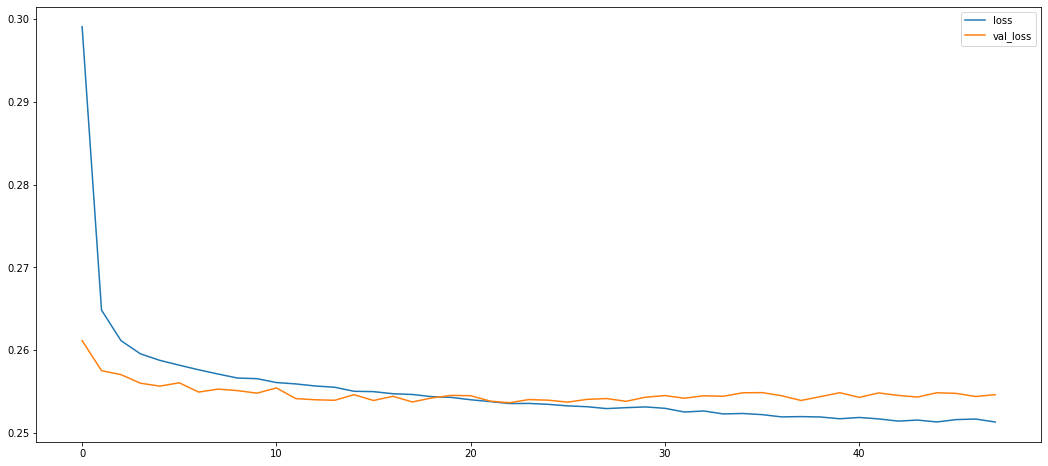

In [150]:
# visualise the loss results
df_loss.plot(figsize=[18,8])

In [151]:
# extracting predictions using x_test from the model and converting them to 1's and 0's
yhat = model.predict(x_test)
yhat_classes = (yhat > 0.5).astype('int32')
yhat_classes

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [0]])

In [152]:
# evaluate the model by looking at a classification report and a confusion matrix
print(confusion_matrix(y_test, yhat_classes))
print('\n')
print(classification_report(y_test, yhat_classes))

[[ 7099  8360]
 [  346 63239]]


              precision    recall  f1-score   support

           0       0.95      0.46      0.62     15459
           1       0.88      0.99      0.94     63585

    accuracy                           0.89     79044
   macro avg       0.92      0.73      0.78     79044
weighted avg       0.90      0.89      0.87     79044



In [153]:
# inspecting how unbalanced the dataset actually is
print("{}%".format(round(df['loan_repaid'].value_counts()[1]/len(df) *100)))

80%


Remember that the dataset was imbalanced between loans being fully repaid and charged off. The percentage of loans fully paid off is 80% which means that if we made a simple model that always predicted fully paid then the model would be 80% accurate. In these scenarios it is thought to treat 80% accuracy as the bottom threshold. Which means the 89% accuracy is ok but is not amazing.

The actual metrics we want to take a look at are precision, recall and f1-score. The true indicator class we should be looking at when considering the three metrics is the 'charged off' category (or 0) because it has a lower representation in the dataset. So the best indicator of how well the model is doing is looking at the f1-score for the 0 class (f1-score) takes the harmonic mean between precision and recall). As we can see 0.62 means there is room for improvement, this could come from adding more neurons, layers or tuning dropout rates etc.

Now the model will be tested on a random person in the dataset.

In [154]:
# randomly selecting a customer
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid', axis=1).iloc[random_ind]
new_customer

loan_amnt           25000.00
term                   60.00
int_rate               18.24
installment           638.11
annual_inc          61665.00
                      ...   
48052                   0.00
70466                   0.00
86630                   0.00
93700                   0.00
earliest_cr_year     1996.00
Name: 305323, Length: 78, dtype: float64

In [155]:
# scaling the data on the new customer and predicting whether this individual paid back their loand or charged off
new_customer = scaler.transform(new_customer.values.reshape(1,78))
(model.predict(new_customer) > 0.5).astype('int32')

array([[1]])

In [156]:
# the model predicts that this person did repay their loan
# look to see if they actually did repay their loan
df.iloc[random_ind]['loan_repaid']

1.0